In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 25.6 MB/s eta 0:00:00


# BERT AS TEXT ENCODER

Para modelos grandes debemos cambiar a un entorno con GPU y utilizar `.to('cuda')` sobre los embeddings que queramos comparar o utilizar en otros modelos de aprendizaje.

### Tokenizer and Model

We load a small distilled model of BERT (Spanish version called BETO).
The large version can be downloaded with `dccuchile/bert-base-spanish-wwm-cased`

In [3]:
from transformers import AutoTokenizer, AutoModelForMaskedLM #tokenizador generico que va a ser capaz de reconocer los tokens, igualmente con el automodel
#for para enmascarar palabras

tokenizer = AutoTokenizer.from_pretrained("dccuchile/distilbert-base-spanish-uncased") #modelo bert reducido

model = AutoModelForMaskedLM.from_pretrained("dccuchile/distilbert-base-spanish-uncased")


### Check Parameters of the transformer

In [4]:
model.eval()

DistilBertForMaskedLM(
  (activation): GELUActivation()
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(31002, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.

### Tokenizer

The tokenizer contains the vocabulary and word pieces recognised by the model. A word piece in BERT starts with "#". The function tokenize allow us to see how the model split texts into tokens.

In [5]:
tokenizer.tokenize("Para solucionar los problemas del país, el presidente debe actuar de inmediato.")

['para',
 'solucionar',
 'los',
 'problemas',
 'del',
 'país',
 ',',
 'el',
 'presidente',
 'debe',
 'actuar',
 'de',
 'inmediato',
 '.']

In [6]:
vocab = tokenizer.get_vocab()

len(vocab)

31002

In [7]:
vocab['del']

1081

### FILL MASK TASK

In [17]:
from transformers import pipeline

pipe = pipeline("fill-mask", model="dccuchile/distilbert-base-spanish-uncased")

#pipe("Para [MASK] los problemas del [MASK], el presidente debe [MASK] de inmediato.")

[{'score': 0.13351115584373474,
  'token': 18632,
  'token_str': 'desaparecida',
  'sequence': 'me entró a robar una persona desaparecida en la tienda de estados unidos.'},
 {'score': 0.11238907277584076,
  'token': 6136,
  'token_str': 'muerta',
  'sequence': 'me entró a robar una persona muerta en la tienda de estados unidos.'},
 {'score': 0.06024353578686714,
  'token': 16885,
  'token_str': 'desconocida',
  'sequence': 'me entró a robar una persona desconocida en la tienda de estados unidos.'},
 {'score': 0.04056035727262497,
  'token': 8238,
  'token_str': 'inocente',
  'sequence': 'me entró a robar una persona inocente en la tienda de estados unidos.'},
 {'score': 0.027873508632183075,
  'token': 2208,
  'token_str': 'importante',
  'sequence': 'me entró a robar una persona importante en la tienda de estados unidos.'}]

## ENCODING TEXTS

In [18]:
import numpy as np

In [20]:
embedder = pipeline('feature-extraction', model = "dccuchile/distilbert-base-spanish-uncased")

vectors = embedder(["Esto es una prueba","Esto es un test","Un gato feliz"], return_tensors = "pt")

vectors = [t[0].numpy().mean(axis=0) for t in vectors]

vectors[0].shape

(768,)

In [21]:
## Similarity between pairs

print(np.dot(vectors[0], vectors[1]))
print(np.dot(vectors[0], vectors[2]))

128.50812
71.37257


## A MORE POWERFUL LIBRARY: SENTENCE TRANSFORMERS

https://www.sbert.net/

SBERT provides some models that have been trained for text semantic similarity and question/answering tasks. But we can also include other models that have not been trained on these tasks.

In [22]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=9bee366752d87bf5d8618888eaaedf96807083c27442b36c1f512e84c2b0ad35
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [23]:
from sentence_transformers import SentenceTransformer, util


model = SentenceTransformer("dccuchile/distilbert-base-spanish-uncased")

#Sentences we want to encode. Example:
sentences = ["Esto es una prueba","Esto es un test","Un gato feliz", "Un perro triste"]


#Sentences are encoded by calling model.encode()
vectors = model.encode(sentences)

In [24]:
## Similarity between pairs

print(np.dot(vectors[0], vectors[1]))
print(np.dot(vectors[0], vectors[2]))

128.50812
71.37257


In [25]:
query = "Un felino contento"
query_embd = model.encode(query)

hits = util.semantic_search(query_embd, vectors, score_function=util.dot_score) #another function is consine

hits

[[{'corpus_id': 2, 'score': 127.24006652832031},
  {'corpus_id': 3, 'score': 120.37110137939453},
  {'corpus_id': 1, 'score': 80.51661682128906},
  {'corpus_id': 0, 'score': 75.78314208984375}]]

<ipython-input-26-744fa55455e6>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


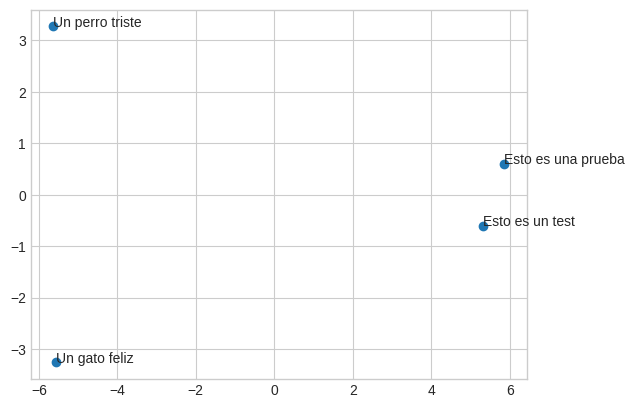

In [26]:
from sklearn.decomposition import PCA

X_PCA  = PCA(n_components=2).fit_transform(vectors)

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

ax.scatter([x[0] for x in X_PCA],[x[1] for x in X_PCA])

for i, lbl in enumerate(sentences):
    plt.annotate(lbl, X_PCA[i])



